In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [380]:
data = pd.read_csv('housing.csv')


In [381]:
data.dropna(inplace=True)

In [382]:
from sklearn.model_selection import train_test_split

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [383]:
train_data = X_train.join(y_train)


test_data = X_test.join(y_test)

train_data
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14416,-117.24,32.79,20.0,961.0,278.0,525.0,254.0,3.1838,NEAR OCEAN,245800.0
16383,-121.29,38.01,2.0,6403.0,1116.0,3327.0,957.0,4.4871,INLAND,137900.0
7731,-118.14,33.92,31.0,3731.0,853.0,2313.0,801.0,3.2237,<1H OCEAN,218200.0
1410,-122.07,37.94,30.0,1260.0,276.0,707.0,221.0,2.8920,NEAR BAY,220800.0
1335,-121.89,37.99,4.0,2171.0,597.0,928.0,461.0,4.1016,INLAND,170500.0
...,...,...,...,...,...,...,...,...,...,...
14148,-117.08,32.73,36.0,1158.0,218.0,619.0,233.0,3.6125,NEAR OCEAN,122500.0
14743,-117.06,32.58,11.0,2879.0,679.0,2098.0,673.0,3.5125,NEAR OCEAN,142400.0
19496,-121.00,37.66,43.0,2369.0,413.0,944.0,422.0,3.2632,INLAND,138100.0
20553,-121.79,38.68,24.0,3794.0,848.0,2225.0,864.0,2.8068,INLAND,95300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

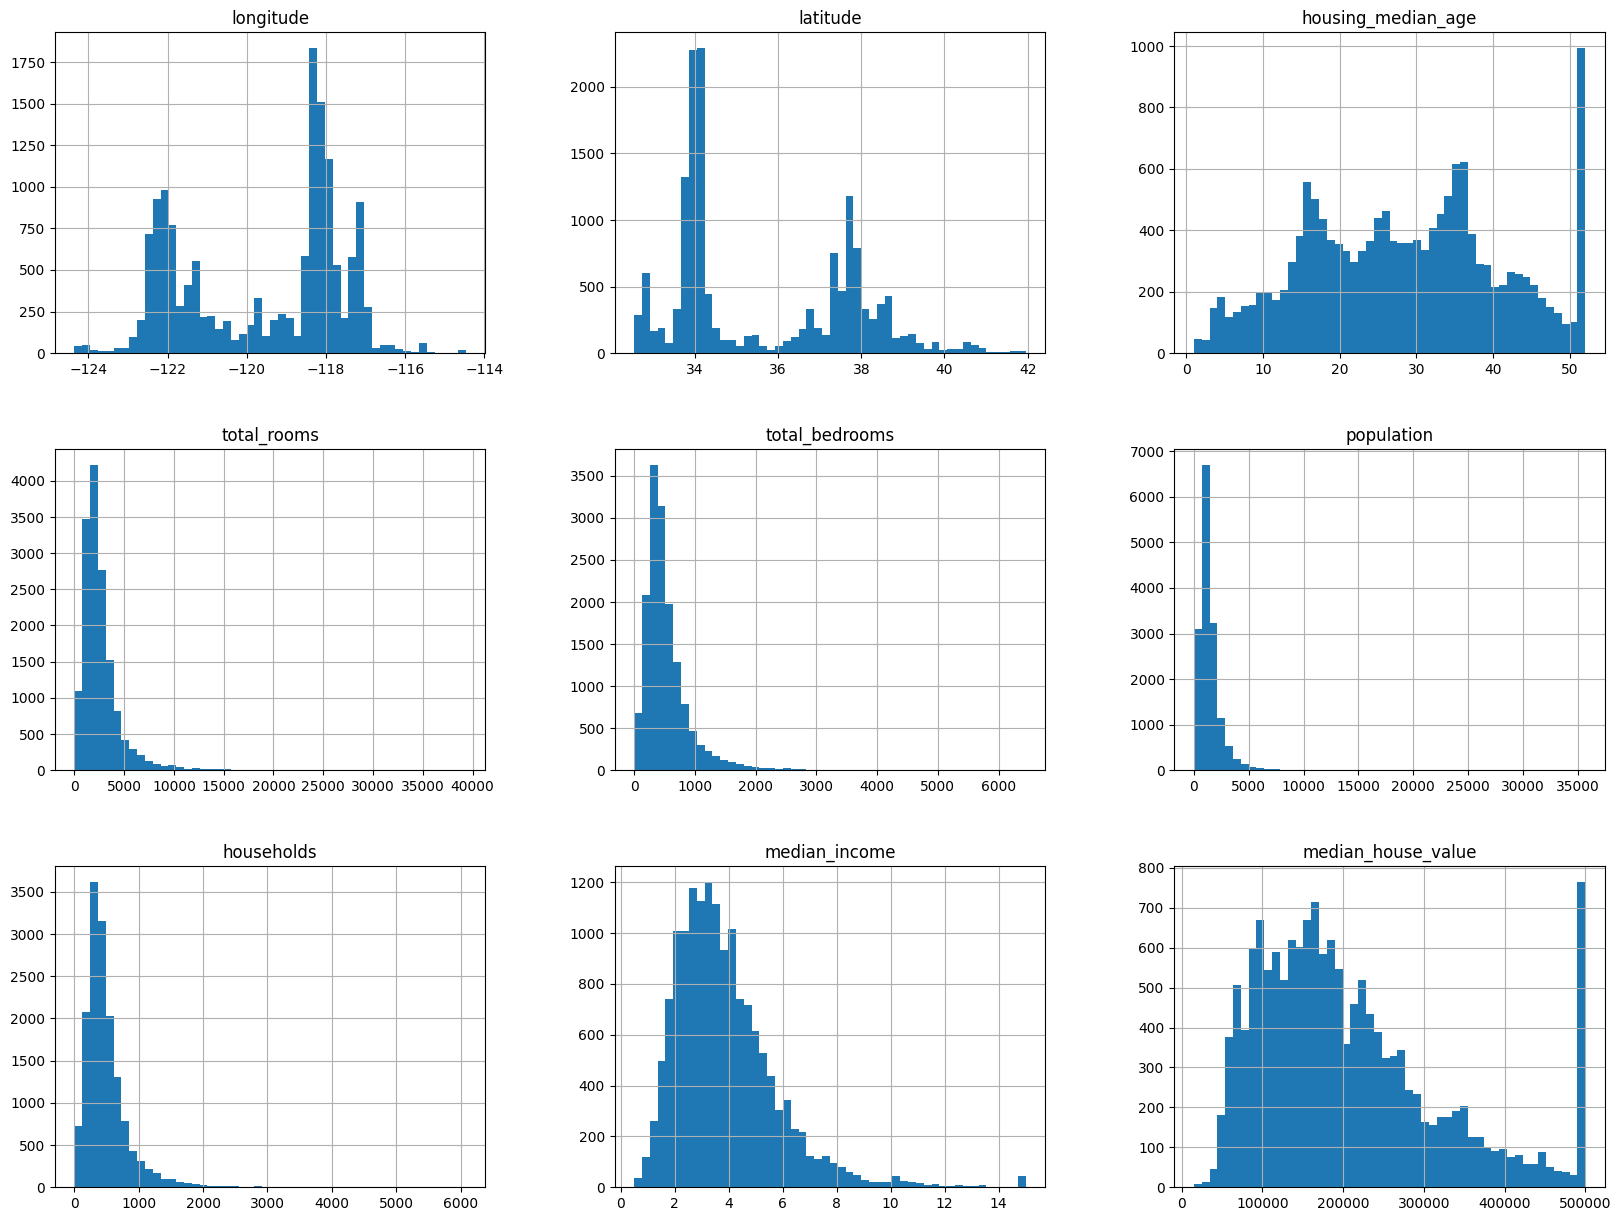

In [384]:
train_data.hist(figsize=(20, 15), bins=50)

<Axes: >

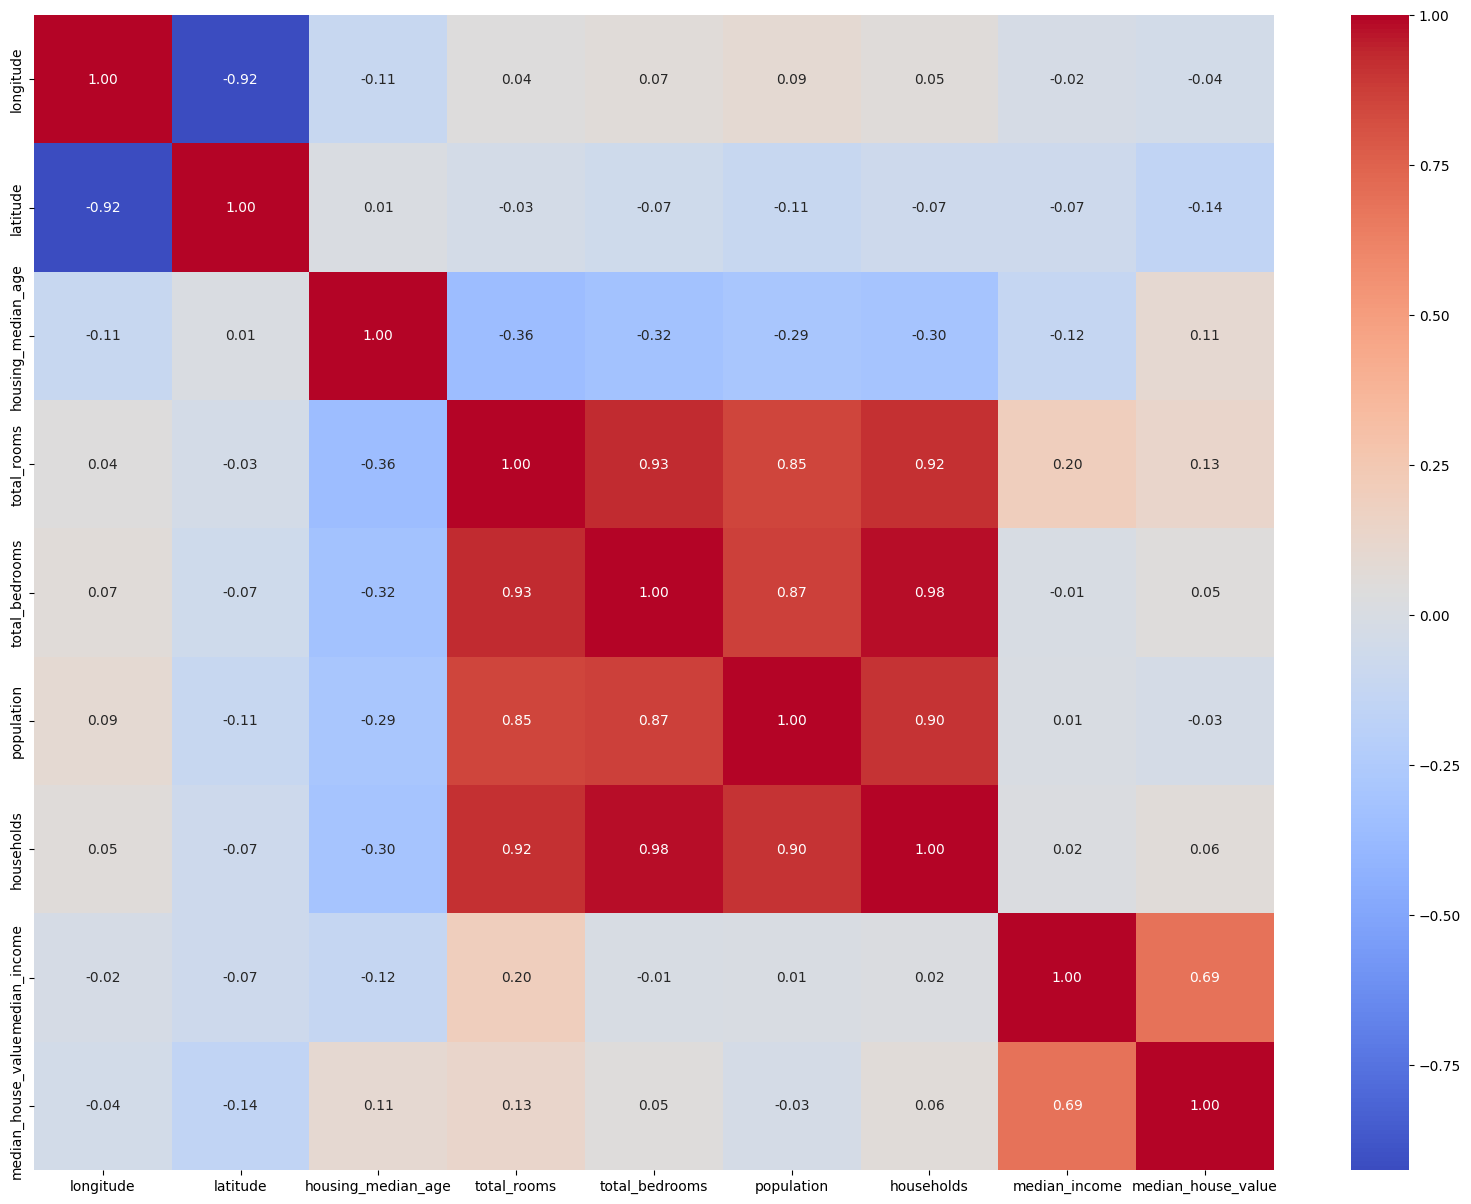

In [385]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [386]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

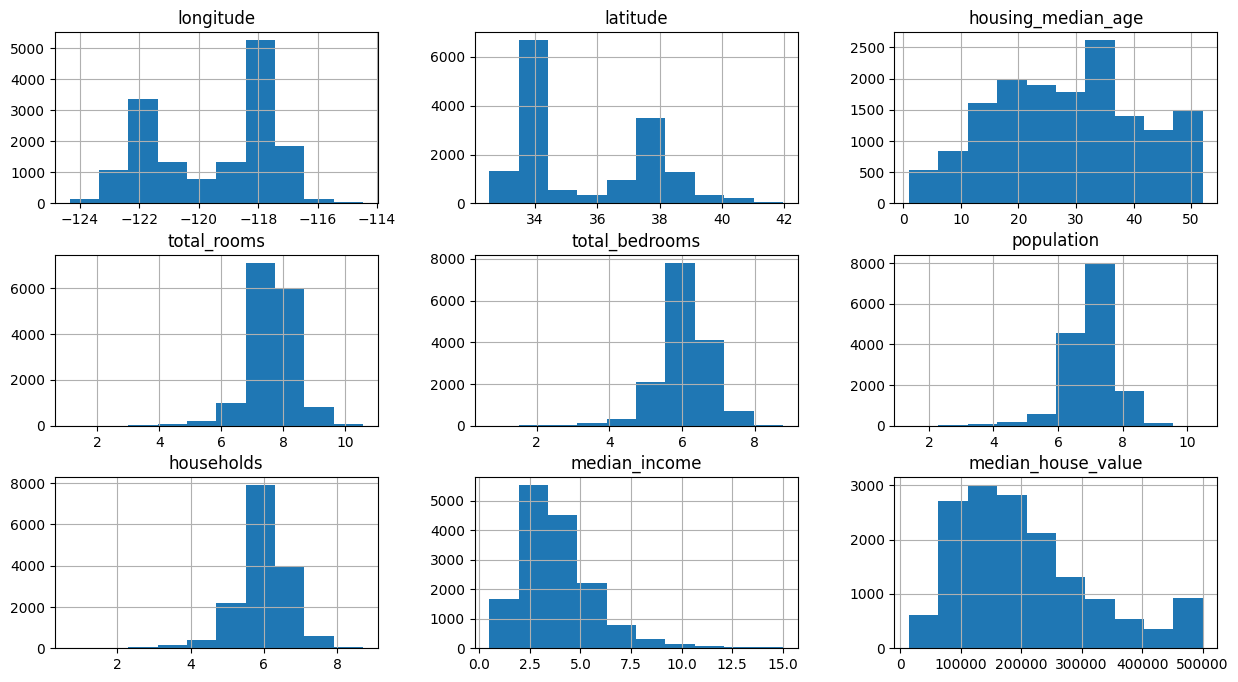

In [387]:
train_data.hist(figsize=(15, 8))

<Axes: xlabel='ocean_proximity'>

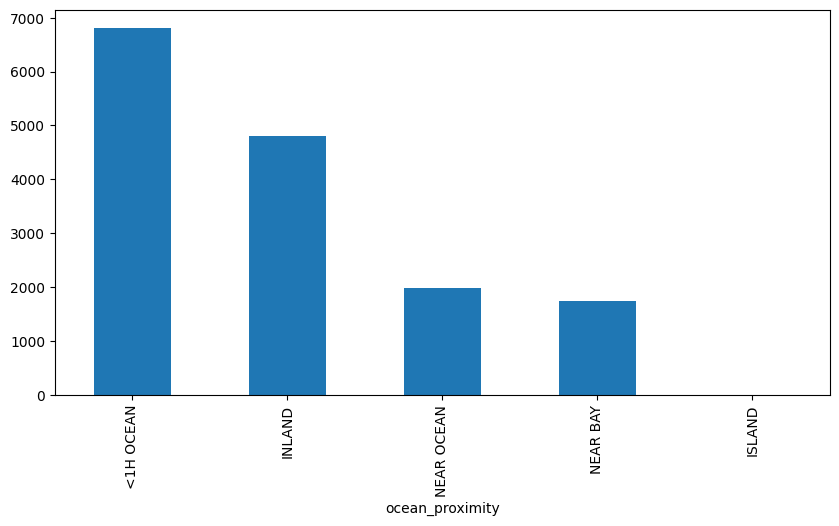

In [388]:
train_data.ocean_proximity.value_counts().plot(kind='bar', figsize=(10, 5))

In [389]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)


In [390]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
2830,-119.01,35.40,11.0,9.075665,7.692113,8.472614,7.560080,1.7109,44600.0,False,True,False,False,False
14951,-116.96,32.71,18.0,7.789040,6.280396,7.029973,6.313548,2.4567,155000.0,True,False,False,False,False
8314,-118.32,33.35,27.0,7.424165,6.257668,6.613384,5.805135,2.1579,450000.0,False,False,True,False,False
14271,-117.12,32.70,38.0,6.708084,5.384495,6.860664,5.446737,1.0531,65700.0,False,False,False,False,True
305,-122.18,37.76,43.0,7.610358,6.013715,7.013915,5.908083,1.8913,91200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,273400.0,True,False,False,False,False
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,160800.0,True,False,False,False,False
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,335400.0,True,False,False,False,False
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,231200.0,False,False,False,True,False


<Axes: >

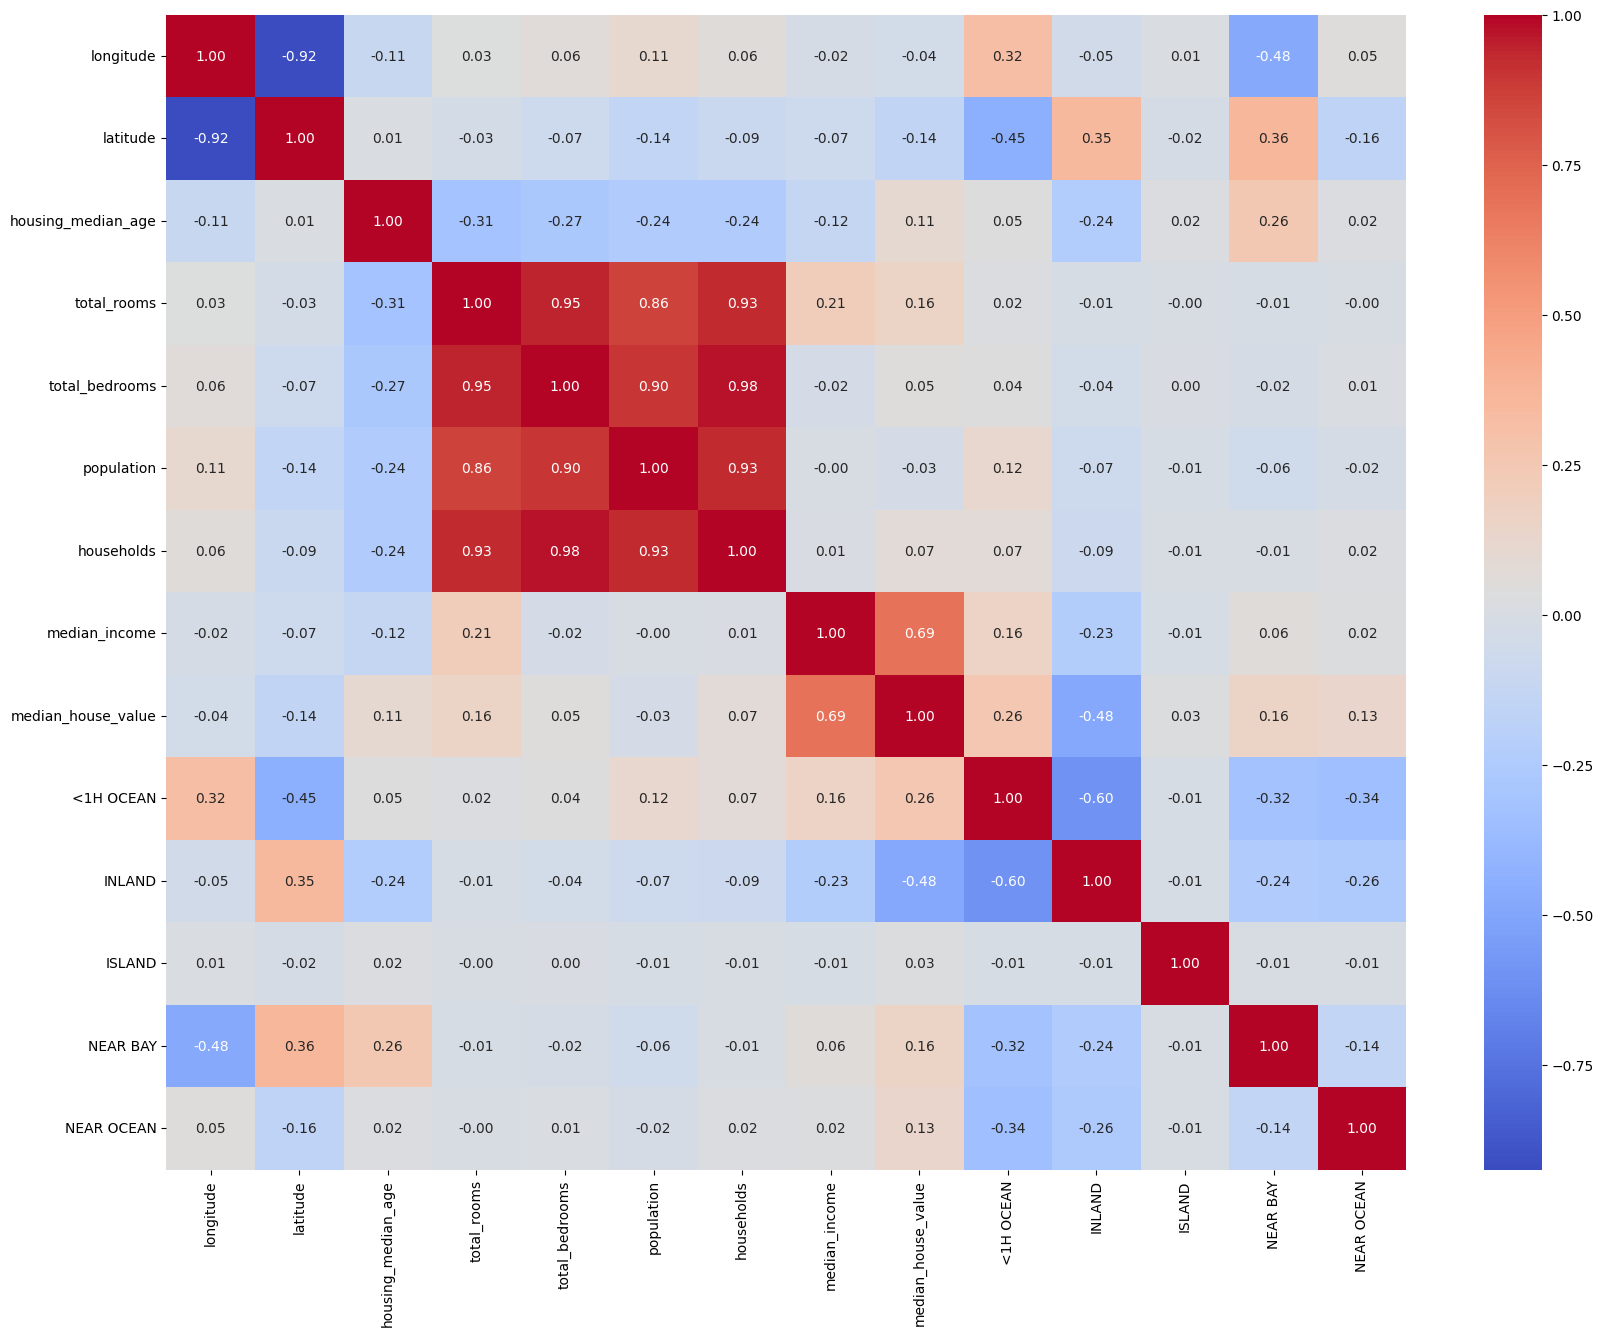

In [391]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='latitude', ylabel='longitude'>

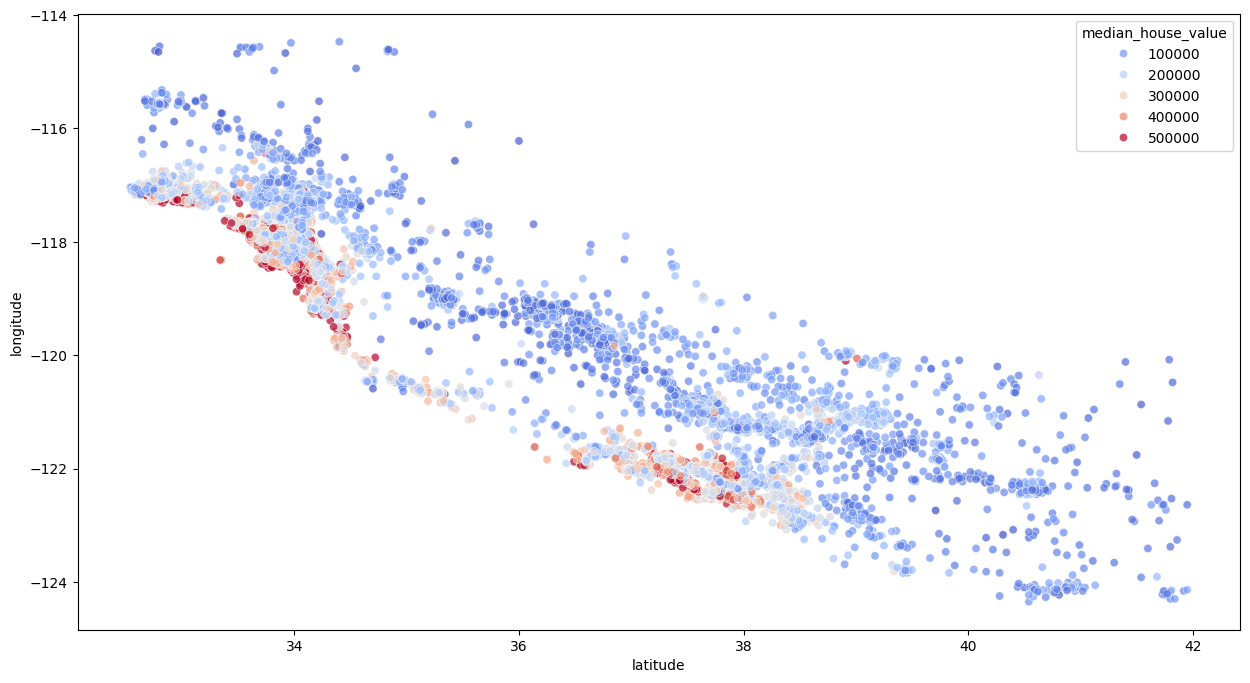

In [392]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm', alpha=0.7)

In [393]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']


<Axes: >

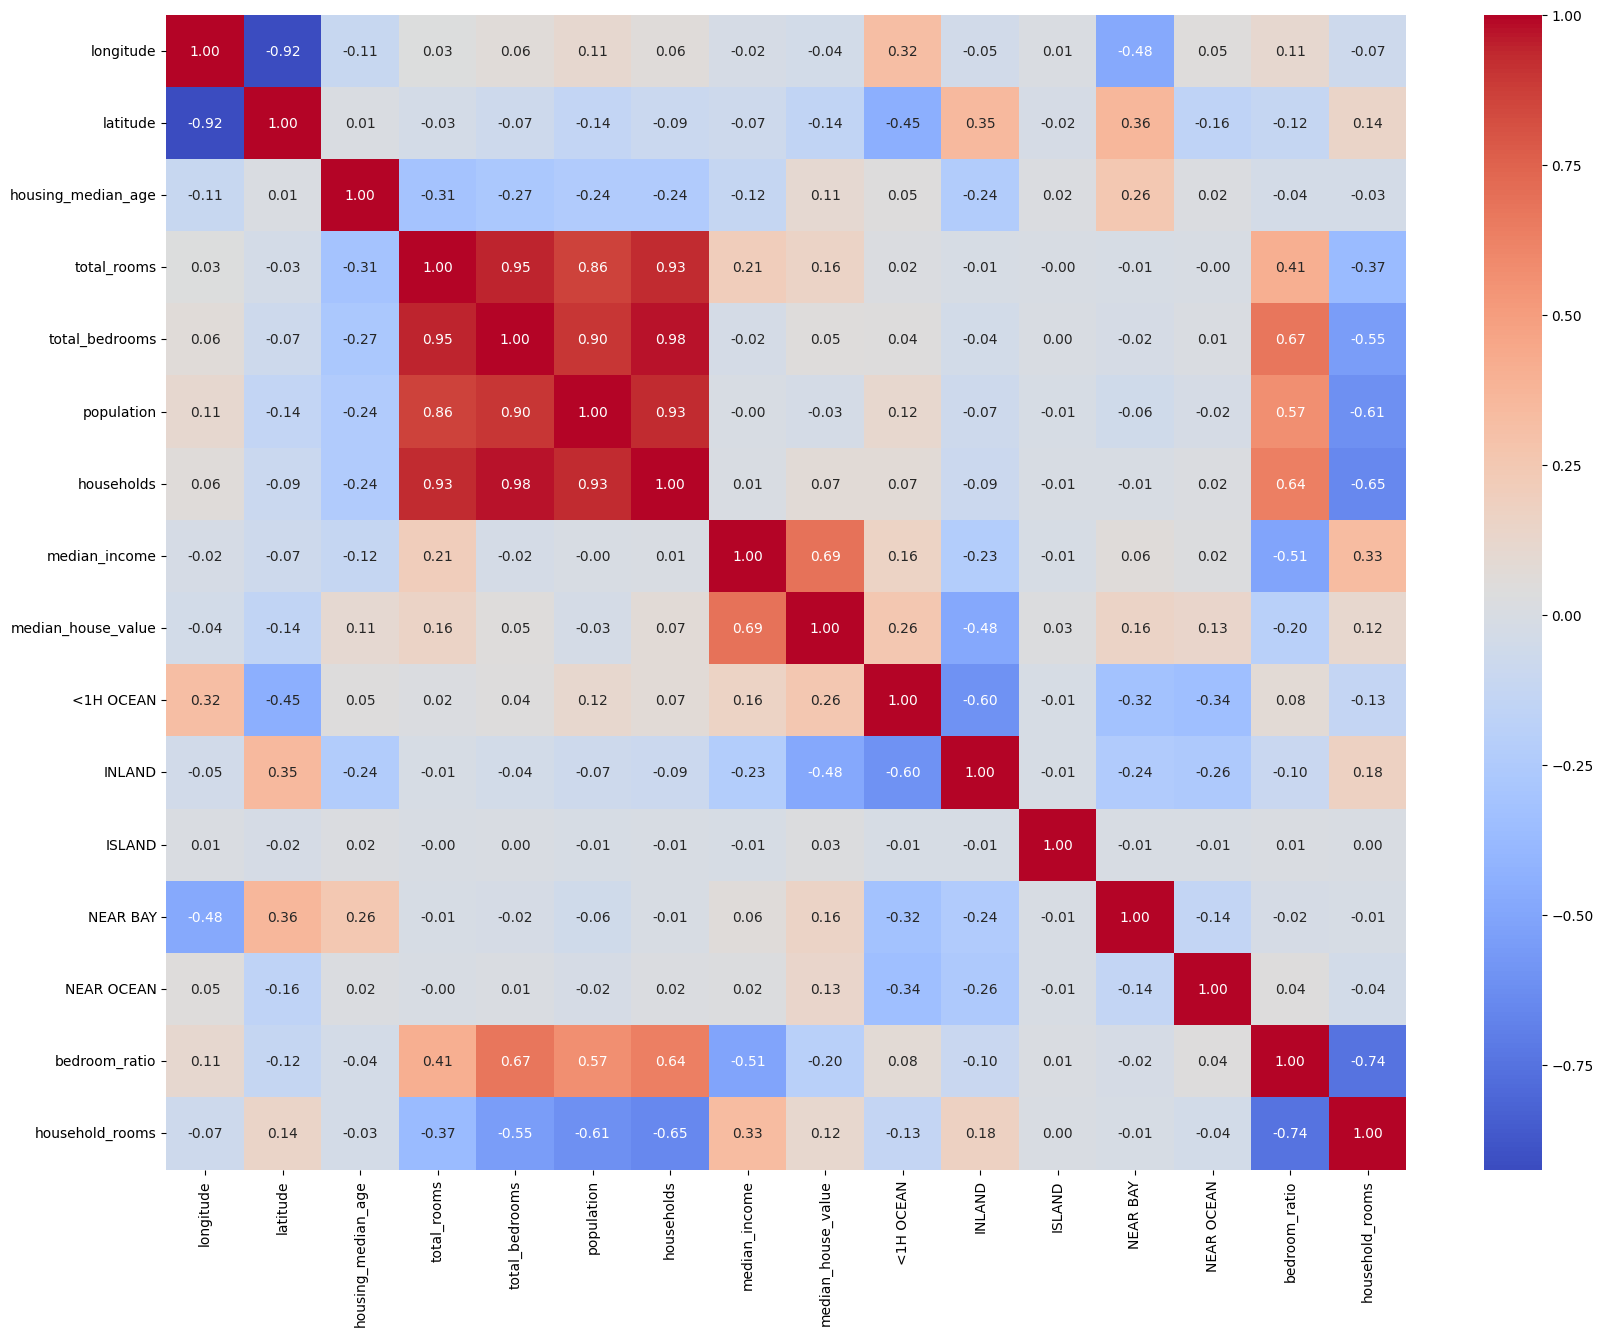

In [394]:
plt.figure(figsize=(20, 15))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')

In [395]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train = train_data.drop('median_house_value', axis=1)
X_train_s = scaler.fit_transform(X_train)
y_train = train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train_s, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [396]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']




In [397]:
X_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

X_test_s = scaler.transform(X_test)

In [398]:
reg.score(X_test_s, y_test)



0.6757863119377261

In [403]:
from sklearn.ensemble import RandomForestRegressor   

forest = RandomForestRegressor()

# Use the correct y_train that matches X_train
forest.fit(X_train_s, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [404]:
forest.score(X_test_s, y_test)

0.8198313364583336

In [411]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 4, 8],
    'min_samples_split': [2, 4],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=   True)
grid_search.fit(X_train_s, y_train)



,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [None, 4, ...], 'min_samples_split': [2, 4], 'n_estimators': [100, 200, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,300


In [412]:
best_forest = grid_search.best_estimator_

In [413]:
best_forest.score(X_test_s, y_test)

0.8211053496996552